In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

dataset = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
dataset_clean = dataset.dropna()

In [4]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


# 1.	Based on the count of game titles, which platform has had the most games?

In [5]:
platform_game_counts = dataset['Platform'].value_counts()
game_count = platform_game_counts.max()
modal_platform = platform_game_counts.idxmax()
print("With {} games, {} has had the most games based on the count of game titles.".format(game_count, modal_platform))

With 2161 games, PS2 has had the most games based on the count of game titles.


# 2.	Which genre of game has generated the most unit sales?

In [6]:
# genre with highest Global_Sales
sales_vs_genre = dataset[['Global_Sales','Genre']]
sales_vs_genre

,Global_Sales,Genre
0,82.53,Sports
1,40.24,Platform
2,35.52,Racing
3,32.77,Sports
4,31.37,Role-Playing
...,...,...
16714,0.01,Action
16715,0.01,Sports
16716,0.01,Adventure
16717,0.01,Platform


<AxesSubplot:xlabel='Genre'>

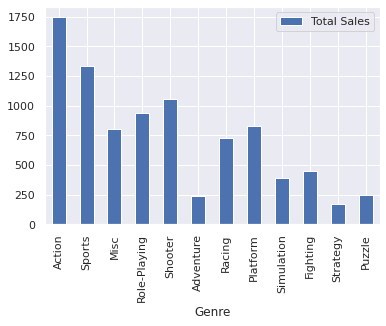

In [7]:
data = []
genres = ['Action','Sports','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']
for genre in genres:
    data.append([genre, sales_vs_genre['Global_Sales'][sales_vs_genre['Genre']==genre].sum()])

total_sales_per_genre = [data[i][1] for i in range(len(data))]

sales_df = pd.DataFrame({'Genre':genres, 'Total Sales':total_sales_per_genre})
sales_df.plot.bar(x='Genre', y='Total Sales')


Therefore, the action genre had the most unit sales.

#### Method note
I wrote this before discovering the groupby() function, which would have made answering this question a little easier! Use of the function is shown in later questions below.

# 3.	Show the annual global unit sales by year for all games between 1995 and 2015

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,Year of Release,Annual Global Unit Sales
153,1996-01-01,20.10
52,1997-01-01,35.01
106,1998-01-01,43.18
67,1999-01-01,51.17
175,2000-01-01,81.24
28,2001-01-01,253.88
24,2002-01-01,288.84
102,2003-01-01,255.35
17,2004-01-01,321.78
11,2005-01-01,334.32


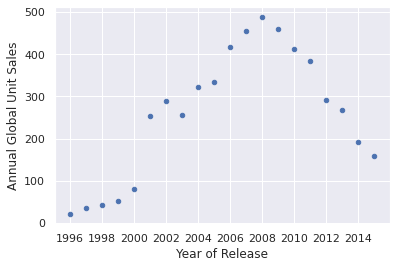

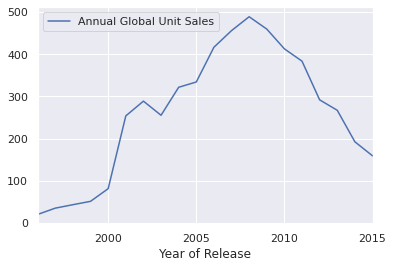

In [8]:
total_global_sales = dataset_clean['Global_Sales'].groupby(dataset_clean['Year_of_Release']).transform('sum')
dataset_clean = dataset_clean.astype({'Year_of_Release': int})
year = dataset_clean['Year_of_Release'][dataset_clean['Year_of_Release'].between(1995, 2015)]
year = pd.to_datetime(year.astype(str), format="%Y")

sales_vs_year = pd.DataFrame({'Year of Release':year, 'Annual Global Unit Sales':total_global_sales})
sales_vs_year = sales_vs_year.drop_duplicates()
sales_vs_year = sales_vs_year.dropna()
sales_vs_year = sales_vs_year.sort_values(by = 'Year of Release', axis='index')

sales_vs_year.plot.scatter(x='Year of Release', y='Annual Global Unit Sales')
sales_vs_year.plot.line(x='Year of Release', y='Annual Global Unit Sales')
sales_vs_year

# 4.	Based on global unit sales, who are the top 5 game publishers?

In [9]:
# sort by Global_Sales and show top 5 Publishers

# gives total global sales by publisher - otherwise gives sum of whole column
total_sales = dataset_clean['Global_Sales'].groupby(dataset_clean['Publisher']).transform('sum')

# create new dataframe of only publisher and total global sales
sales_vs_publisher = pd.DataFrame({
    'Total_Global_Sales': total_sales,
    'Publisher': dataset_clean['Publisher']
})

# drop duplicates created by the summing - otherwise 
# it creates one row for each row we had in initial dataset
sales_vs_publisher = sales_vs_publisher.drop_duplicates()

# sort in descending order by total global sales
sales_vs_publisher = sales_vs_publisher.sort_values(by=['Total_Global_Sales'], ascending=False)

# top 5 rows
sales_vs_publisher.head()

,Total_Global_Sales,Publisher
77,868.55,Electronic Arts
0,849.49,Nintendo
29,535.74,Activision
28,388.10,Sony Computer Entertainment
16,350.17,Take-Two Interactive


Based on global unit sales, the top 5 game publishers are Electronic Arts, Nintendo, Activision, Sony Computer Entertainment, and Take-Two Interactive.

# 5.	Based on global unit sales, who were the top 5 game publishers in 1995?

In [10]:
# select total global sales, publisher from dataset where Year_of_Release = 1995

# can't use the cleaned dataset here because there are no instances of 1995 games without any null values (some not released in other regions etc)
# selects only entries with year 1995
dataset_95 = dataset[dataset['Year_of_Release'] == 1995]

# calculate total sales per publisher
total_sales_95 = dataset_95['Global_Sales'].groupby(dataset_95['Publisher']).transform('sum')
sales_vs_publisher_95 = pd.DataFrame({
    'Total_Global_Sales': total_sales_95,
    'Publisher': dataset_95['Publisher']
})

sales_vs_publisher_95 = sales_vs_publisher_95.drop_duplicates()

sales_vs_publisher_95 = sales_vs_publisher_95.sort_values(by='Total_Global_Sales', ascending=False)
sales_vs_publisher_95.head()

,Total_Global_Sales,Publisher
321,18.45,Sony Computer Entertainment
191,16.72,Nintendo
893,7.93,Sega
687,5.10,SquareSoft
273,4.21,Activision


Based on global unit sales, the top 5 game publishes in *1995* were Sony, Nintendo, Sega, SquareSoft and Activision.

# 6.	Show global annual unit sales by year for “Electronic Arts”, “Nintendo” and “Sony Computer Entertainment” between 1990 and 2015

<AxesSubplot:xlabel='Year_of_Release', ylabel='Total_Global_Sales'>

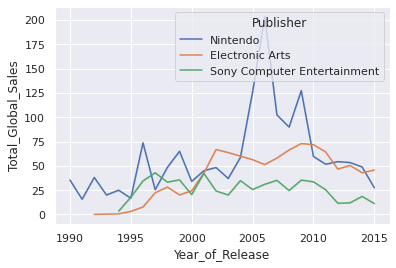

In [11]:
# make a list of publishers so we don't have to type it out later
publisher_list = ['Electronic Arts', 'Nintendo', 'Sony Computer Entertainment']

# create a panda series (not a new dataframe as done previously)
# format dataset[rows][columns]
data = dataset[
    (dataset['Publisher'].isin(publisher_list))
    &
    (dataset['Year_of_Release'].between(1990,2015))
][
    ['Global_Sales','Year_of_Release','Publisher']
].drop_duplicates()

# create new column of total sales
data['Total_Global_Sales'] = data.groupby(['Publisher', 'Year_of_Release']).transform('sum')

# order data before plotting line chart or you end up with spaghetti!
data = data.sort_values(by=['Year_of_Release'])
sns.lineplot(data=data, x="Year_of_Release", y="Total_Global_Sales", hue="Publisher")

# a.	Which year saw the most unit sales for Nintendo?

In [12]:
# select year_of_release and total_global_sales where publisher = Nintendo
# sorted by total_global_sales, showing top 5 rows
data[dataset['Publisher'] == 'Nintendo'][['Year_of_Release', 'Total_Global_Sales']].sort_values(by='Total_Global_Sales', ascending=False).drop_duplicates().head()

/tmp/ipykernel_47217/4068845809.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[dataset['Publisher'] == 'Nintendo'][['Year_of_Release', 'Total_Global_Sales']].sort_values(by='Total_Global_Sales', ascending=False).drop_duplicates().head()


,Year_of_Release,Total_Global_Sales
3782,2006.0,203.38
10288,2009.0,127.39
820,2005.0,125.91
308,2007.0,102.46
3895,2008.0,89.92


2006 was the best year for Nintendo with 203.38 million units sold.

# b.	When did Electronic Arts start generating more annual global unit sales than Sony?

EA started generating more annual global unit sales than Sony around the year 2001, following the release of the first Sims game.

# 7.	If you were a designer writing a new game in 2005, what genre and platform would you choose? Explain why?

### Genre

,Global_Sales,Year_of_Release,Genre,Total_Global_Sales
0,82.53,2006.0,Sports,135.83
4094,0.48,2006.0,Sports,135.83
1508,1.30,2006.0,Sports,135.83
286,4.11,2006.0,Sports,135.83
11356,0.08,2006.0,Sports,135.83


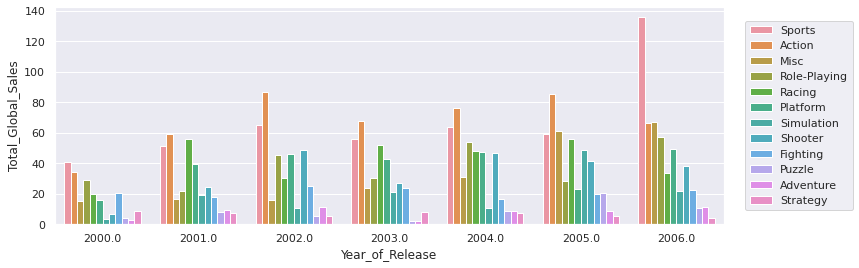

In [13]:
# get data on genres
data_q7 = dataset[dataset['Year_of_Release'].between(2000,2006)][['Global_Sales','Year_of_Release','Genre']]
data_q7["Total_Global_Sales"] = data_q7.groupby(['Genre', 'Year_of_Release']).transform('sum')
data_q7 = data_q7.drop_duplicates()
data_q7 = data_q7.sort_values(by='Total_Global_Sales', ascending=False)


# create matplotlib figure and axis, used later to change legend location
fig, ax1 = plt.subplots(1,1)

# create barchart plot
barchart = sns.barplot(x="Year_of_Release", y="Total_Global_Sales", hue="Genre", data=data_q7, ax=ax1)

# move legend to right so we can see the barchart
box = barchart.get_position()
barchart.set_position([box.x0, box.y0, box.width * 2, box.height])
barchart.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

data_q7.head()

Looking at the total global unit sales per genre and year of release over the last 5 years, I would choose to develop an Action game, if I wanted to play it safe, or maybe a Sports game, if I thought that those might rise further in popularity in the next year. The Sports jump in 2006 is probably largely due to the release of Wii Sports in November 2006 following the release of the Wii. Interesting to see how big an impact it made!

### Platform

,Year_of_Release,Platform,Total_Global_Sales
6264,2004.0,PS2,211.78
8539,2002.0,PS2,205.40
7076,2003.0,PS2,184.29
4521,2001.0,PS2,166.43
3747,2005.0,PS2,160.65


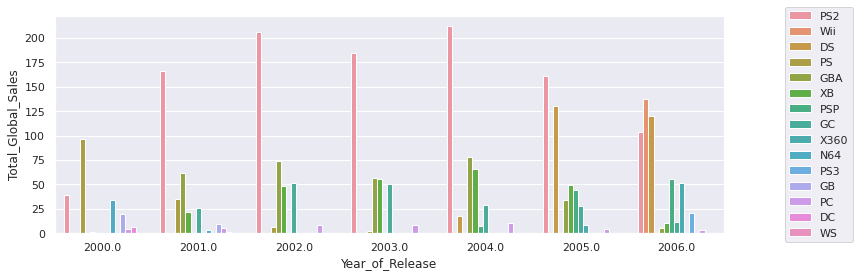

In [14]:
data_q7 = dataset[dataset['Year_of_Release'].between(2000,2006)][['Global_Sales','Year_of_Release','Platform']]
data_q7["Total_Global_Sales"] = data_q7.groupby(['Platform', 'Year_of_Release']).transform('sum')
data_q7 = data_q7.sort_values(by='Total_Global_Sales', ascending=False)
data_q7 = data_q7[['Year_of_Release', 'Platform', 'Total_Global_Sales']].drop_duplicates()

# create matplotlib figure and axis, used later to change legend location
fig, ax1 = plt.subplots(1,1)

barchart = sns.barplot(x="Year_of_Release", y="Total_Global_Sales", hue="Platform", data=data_q7, ax=ax1)

# move legend to right so we can see the barchart
box = barchart.get_position()
barchart.set_position([box.x0, box.y0, box.width * 2, box.height])
barchart.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

data_q7.head()

Looking at the most popular platform over the last 5 years, I would choose to develop on PS2, however, the DS makes a notable jump between 2004 and 2005 so that would also be a good option, as it looks like it may over-take the PS2 in 2006 (which it does, but then the Wii comes out and overtakes *that*).

### Conclusion
I would advise making an Action game on PS2 in the year 2005 based on this data, or possibly a Sports game on DS following rising trends.

# 8.	Stretch Question (you do not have to complete this question, but we will be interested in your opinion if you are able to work on this research) - Based on historical unit sales of games for Sony PlayStation, PlayStation 2, PlayStation 3 & PlayStation 4 what do you expect to see over the next few years for games growth and decline for PlayStation 5?

<AxesSubplot:xlabel='Year_of_Release', ylabel='Total_Global_Sales'>

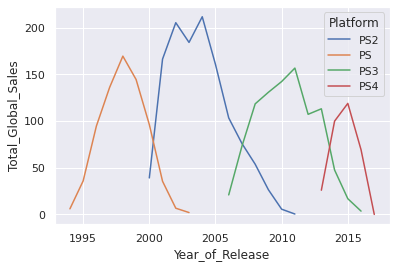

In [15]:
platform_list = ['PS','PS2','PS3','PS4']

data_q8 = dataset[dataset['Platform'].isin(platform_list)][['Global_Sales','Year_of_Release','Platform']]

data_q8['Total_Global_Sales'] = data_q8.groupby(['Platform', 'Year_of_Release']).transform('sum')
data_q8 = data_q8.sort_values(by='Total_Global_Sales', ascending=False)
data_q8 = data_q8[['Year_of_Release', 'Platform', 'Total_Global_Sales']].drop_duplicates()

sns.lineplot(x="Year_of_Release", y="Total_Global_Sales", hue="Platform", data=data_q8)

From the graph we can see that the PlayStations rise and fall in popularity (based on unit sales) over time. The first PlayStation peaked around 1997, roughly two years after its release. The second PlayStation had a longer peak, around 2002 to 2004. The third PlayStation reached its highest peak much later in its life, peaking first around 2007 as expected, but then rising further to its highest point in 2011. The PS4 peaked as expected 2 years after launch, around 2015. 

Based on these trends, I would expect to see peak global unit sales for games on PS5 around 2022/2023, two years after launch. However, with the supply chain issues it has faced, that peak may come much later than it has for previous PlayStations.

I referred to previous lab work at university and the documentation for pandas to find the methods I needed.